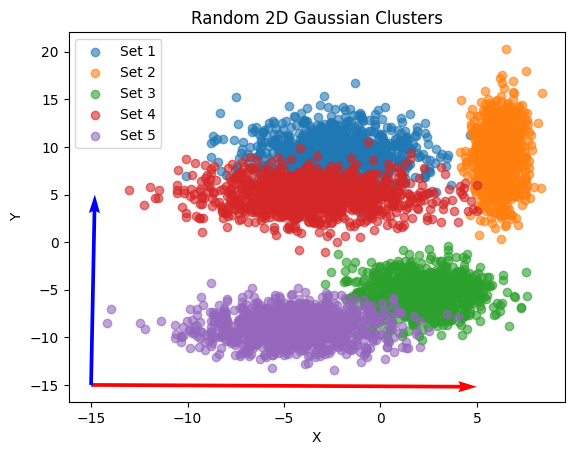

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_sets = 5          # number of Gaussian clusters
points_per_set = 1000 # points per cluster
dim = 2               # 2D data
np.random.seed(42)    # for reproducibility

all_data = []
all_means = []

# Create the plot
fig, ax = plt.subplots()

for i in range(num_sets):
    # Random mean and standard deviation
    mean = np.random.uniform(-10, 10, size=dim)
    std = np.random.uniform(0.5, 3.0, size=dim)

    # Generate Gaussian-distributed data
    data = np.random.normal(loc=mean, scale=std, size=(points_per_set, dim))
    all_data.append(data)

    # Plot each cluster
    plt.scatter(data[:, 0], data[:, 1], label=f'Set {i+1}', alpha=0.6)

for data in all_data:
    X_centered = data - np.mean(data, axis=0)
    S = X_centered.T @ X_centered
    eigvals, eigvecs = np.linalg.eig(S)

# Define the origin for the vectors (all starting at (0,0))
origin_x = [-15, -15]
origin_y = [-15, -15]

# Define the components of the vectors (u and v for quiver)
u_components = [eigvecs[0,0], eigvecs[0,1]]
v_components = [eigvecs[1,0], eigvecs[1,1]]

ax.quiver(origin_x, origin_y, u_components, v_components,
          color=['r', 'b'], angles='xy', scale_units='xy', scale=0.05)

plt.title('Random 2D Gaussian Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [2]:
import pandas as pd

# Path to your .txt file
input_file = "C:/Users/IdeRy/Downloads/fighters_stats.txt"
output_file = "C:/Users/IdeRy/Downloads/fighters_stats.csv"

# Read the entire file
with open(input_file, "r", encoding="utf-8") as f:
    content = f.read().strip()

# Split data by blank lines (each block is one fighter)
fighters_data = content.split("\n\n")

# Parse each fighter’s data
fighters_list = []
for fighter in fighters_data:
    fighter_dict = {}
    lines = fighter.strip().split("\n")
    for line in lines:
        if ":" in line:
            key, value = line.split(":", 1)
            key = key.strip()
            value = value.strip()
            # Convert numeric values where possible
            try:
                value = float(value)
                if value.is_integer():
                    value = int(value)
            except ValueError:
                pass
            fighter_dict[key] = value
    fighters_list.append(fighter_dict)

# Convert to DataFrame
df = pd.DataFrame(fighters_list)

# Save to CSV
df.to_csv(output_file, index=False)

print(f"✅ CSV saved as '{output_file}'")
print(df.head())  # preview


✅ CSV saved as 'C:/Users/IdeRy/Downloads/fighters_stats.csv'
               name  wins  losses  height  weight   reach    stance age  SLpM  \
0      Amanda Ribas    12       5  160.02   56.70  167.64  Orthodox  30  4.63   
1    Rose Namajunas    13       6  165.10   56.70   165.1  Orthodox  31  3.69   
2     Karl Williams    10       1  190.50  106.59  200.66  Orthodox  34  2.87   
3       Justin Tafa     7       4  182.88  119.75  187.96  Southpaw  30  4.09   
4  Edmen Shahbazyan    13       4  187.96   83.91   190.5  Orthodox  26  3.60   

   sig_str_acc  SApM  str_def  td_avg  td_acc  td_def  sub_avg  
0         0.40  3.40     0.61    2.07    0.51    0.85      0.7  
1         0.41  3.51     0.63    1.38    0.47    0.59      0.5  
2         0.52  1.70     0.60    4.75    0.50    1.00      0.2  
3         0.54  5.02     0.47    0.00    0.00    0.50      0.0  
4         0.52  4.09     0.45    2.24    0.38    0.63      0.6  


In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
output_file = "C:/Users/IdeRy/Downloads/fighters_stats.csv"

df = pd.read_csv(output_file)
df = df.dropna()
df = df.groupby('name').mean(numeric_only =True).get(["wins", "SLpM", "sig_str_acc", "SApM", "str_def", "td_avg", "td_acc", "td_def","sub_avg"])
# df = df.T
df


,wins,SLpM,sig_str_acc,SApM,str_def,td_avg,td_acc,td_def,sub_avg
name,,,,,,,,,
AJ Cunningham,11.0,7.66,0.29,11.90,0.48,0.00,0.00,0.33,0.0
AJ Dobson,7.0,4.29,0.46,5.31,0.46,1.67,0.75,0.65,0.3
AJ Fletcher,10.0,3.36,0.49,4.61,0.46,1.54,0.35,0.33,0.9
Aalon Cruz,8.0,7.58,0.39,8.88,0.58,0.00,0.00,0.00,0.0
Aaron Phillips,12.0,1.51,0.53,3.66,0.43,0.86,0.50,0.44,0.6
...,...,...,...,...,...,...,...,...,...
Zhang Mingyang,17.0,9.23,0.57,6.39,0.57,0.00,0.00,0.00,0.0
Zhang Tiequan,15.0,1.23,0.36,2.14,0.51,1.95,0.58,0.75,3.4
Zhang Weili,24.0,5.94,0.51,3.44,0.53,2.29,0.42,0.66,0.4


In [2]:
df.to_numpy()[0]

array([11.  ,  7.66,  0.29, 11.9 ,  0.48,  0.  ,  0.  ,  0.33,  0.  ])

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
import plotly.express as px
import time
start_time = time.perf_counter()

# Copy + mean-center
df_copy = df.copy() # we copy to avoid modifying the original dataframe

# Compute z-scores for each numerical column (outlier deletion step 1)
z_scores = np.abs(zscore(df_copy, nan_policy='omit'))

# Set threshold for outlier detection (outlier deletion part 2)
threshold = 3

# Keep only rows where all z-scores are below the threshold (outlier deletion step 3)
df_pruned = df_copy[(z_scores < threshold).all(axis=1)]

# Standardize the data (Important for PCA)
scaler = StandardScaler()
X = scaler.fit_transform(df_pruned) # Center at mean, divide by standard deviation

# Calculating covariance matrix and its eigenvalues/vectors
S = X.T @ X # We don't need to normalize by n-1 for PCA; scalar multiples do not affect eigenvectors
eigvals, eigvecs = np.linalg.eig(S) # eigenvalue decomposition

# Sort by descending eigenvalue
idx = np.argsort(eigvals)[::-1] # np.argsort sorts INDICES that WOULD SORT the array in ascending order; [::-1] reverses the order
eigvals = eigvals[idx] # sorted eigenvalues
eigvecs = eigvecs[:, idx] # sorted eigenvectors

# Top 3 components
W = eigvecs[:, :3]
X_pca = X @ W

# Create dictionary of Labels vs. Eigenvector Weights
pca_weights_1 = dict(zip(df_pruned.columns, W[:, 0])) # zip() creates an abstract object that combies information from both 'df_prunced.columns' and 'W[:, 0]'
pca_weights_2 = dict(zip(df_pruned.columns, W[:, 1])) # dict() automatically 'unzips' the information with the first argument as keys and the second as values
pca_weights_3 = dict(zip(df_pruned.columns, W[:, 2])) # We do this 3 times for our 3 principal components!

# Create DataFrame for visualization
pca_df = pd.DataFrame({
    'PCA 1': X_pca[:, 0],
    'PCA 2': X_pca[:, 1],
    'PCA 3': X_pca[:, 2],
    'Fighter': df_pruned.index,
    'Wins': df_pruned.get('wins')
})

# 2D scatter plot
fig = px.scatter(
    pca_df,
    x='PCA 1',
    y='PCA 2',
    hover_name='Fighter',       # main hover label
    hover_data={'Wins': True},  # extra data to show
    title='UFC Data: PCA 2D Projection (NO SKLEARN)',
    width=800,
    height=700
)

fig.update_traces(marker=dict(size=5, opacity=0.7))
fig.show()

end_time = time.perf_counter()
elapsed_time = end_time - start_time
print(f"Execution time: {elapsed_time:.6f} seconds")

Execution time: 0.038294 seconds


In [71]:
pca_df.loc[pca_df['fighter'] == 'Dustin Poirier']

,PC1,PC2,fighter
477,-0.162387,1.246422,Dustin Poirier


In [74]:
exploratory = pca_df.copy().set_index("fighter")
exploratory = exploratory.assign(
    PC1=exploratory.get('PC1').abs(),
    PC2=exploratory.get('PC2').abs(),
    dist=(np.sqrt(exploratory.get('PC1')**2 + exploratory.get('PC2')**2))
)
exploratory = exploratory.sort_values(by='dist', ascending=False)

In [ ]:
exploratory = pca_df.copy().set_index("fighter")

# Compute z-scores for each numerical column (outlier detection step 1)
z_scores = np.abs(zscore(exploratory, nan_policy='omit'))

# Set threshold for outlier detection (outlier detection part 2)
threshold = 1

# Keep only rows where all z-scores are below the threshold (outlier detection step 3)
exploratory = exploratory[(z_scores > threshold).all(axis=1)]
exploratory = exploratory.sort_values(by='PC2', ascending=False)
exploratory.head(30)

,PC1,PC2
fighter,,
Tom Aspinall,-2.064623,4.691776
Umar Nurmagomedov,-3.214308,4.103405
Brendan Loughnane,2.315506,2.944991
Steven Nguyen,2.385880,2.944889
Shane Burgos,2.678654,2.913866
Justin Gaethje,3.251863,2.908907
Ryan Janes,1.657635,2.877707
Adlan Amagov,-3.456309,2.838247
Mounir Lazzez,1.822160,2.761151


In [18]:
# Extract most critical columns based on eigenvector weight

keys_1 = list(pca_weights_1.keys())
values_1 = list(pca_weights_1.values())
sorted_value_index_1 = np.argsort(np.abs(values_1))[::-1] # Again, np.argsort gives indices that would sort the array in ascending order
sorted_dict_1 = {keys_1[i]: np.abs(values_1)[i] for i in sorted_value_index_1}
crit_cols_1 = str(list(sorted_dict_1.keys())[:3]) + " (1)"

keys_2 = list(pca_weights_2.keys())
values_2 = list(pca_weights_2.values())
sorted_value_index_2 = np.argsort(np.abs(values_2))[::-1]
sorted_dict_2 = {keys_2[i]: np.abs(values_2)[i] for i in sorted_value_index_2}
crit_cols_2 = str(list(sorted_dict_2.keys())[:3]) + " (2)"

keys_3 = list(pca_weights_3.keys())
values_3 = list(pca_weights_3.values())
sorted_value_index_3 = np.argsort(np.abs(values_3))[::-1]
sorted_dict_3 = {keys_3[i]: np.abs(values_3)[i] for i in sorted_value_index_3}
crit_cols_3 = str(list(sorted_dict_3.keys())[:3]) + " (3)"

In [24]:
sorted_dict_1

{'SApM': np.float64(0.5411866475077509),
 'td_avg': np.float64(0.4579884950128159),
 'td_acc': np.float64(0.3721653944558914),
 'SLpM': np.float64(0.35244202291704474),
 'sub_avg': np.float64(0.3436149814129435),
 'wins': np.float64(0.268062247650296),
 'str_def': np.float64(0.20363923822793825),
 'sig_str_acc': np.float64(0.054035911728858306),
 'td_def': np.float64(0.017990205048280673)}

In [25]:
print(f'The 3 most critical columns for Principal Component 1 are: {crit_cols_1}')
print(f'The 3 most critical columns for Principal Component 2 are: {crit_cols_2}')

The 3 most critical columns for Principal Component 1 are: ['SApM', 'td_avg', 'td_acc'] (1)
The 3 most critical columns for Principal Component 2 are: ['td_def', 'SLpM', 'sig_str_acc'] (2)


In [26]:
X

array([[-1.19087363,  0.6697064 ,  0.20333046, ...,  1.76506207,
         0.28449388, -0.38477627],
       [-0.7506183 , -0.04776243,  0.5699427 , ..., -0.07018331,
        -1.11006605,  0.61126103],
       [-0.45711475, -1.47498538,  1.05875903, ...,  0.61803371,
        -0.63068608,  0.11324238],
       ...,
       [ 1.30390656,  1.94263498,  0.81435087, ...,  0.25098463,
         0.32807387, -0.21877005],
       [ 0.71689946, -0.19434208, -0.65209811, ...,  0.11334123,
         1.8097938 , -0.88279492],
       [-0.31036297,  0.60027394, -0.65209811, ..., -1.67602301,
        -2.54820598, -0.88279492]], shape=(1690, 9))

In [27]:
eigvals

array([3517.35998374, 2930.67299247, 2156.76808709, 1613.25131404,
       1420.67475084, 1191.68382266, 1095.91228766,  909.57794738,
        374.09881411])

In [28]:
# Create dictionary of Labels vs. Eigenvector Weights
pca_weights_1 = dict(zip(df_pruned.columns, W[:, 0])) # zip() creates an abstract object that combies information from both 'df_prunced.columns' and 'W[:, 0]'
pca_weights_2 = dict(zip(df_pruned.columns, W[:, 1])) # dict() automatically 'unzips' the information with the first argument as keys and the second as values
pca_weights_3 = dict(zip(df_pruned.columns, W[:, 2])) # We do this 3 times for our 3 principal components!

# Extract most critical columns based on eigenvector weight

keys_1 = list(pca_weights_1.keys())
values_1 = list(pca_weights_1.values())
sorted_value_index_1 = np.argsort(values_1) # Again, np.argsort gives indices that would sort the array in ascending order
sorted_dict_1 = {keys_1[i]: values_1[i] for i in sorted_value_index_1}
crit_cols_1 = str(list(sorted_dict_1.keys())[:3]) + " (1)"

keys_2 = list(pca_weights_2.keys())
values_2 = list(pca_weights_2.values())
sorted_value_index_2 = np.argsort(values_2)
sorted_dict_2 = {keys_2[i]: values_2[i] for i in sorted_value_index_2}
crit_cols_2 = str(list(sorted_dict_2.keys())[:3]) + " (2)"

keys_3 = list(pca_weights_3.keys())
values_3 = list(pca_weights_3.values())
sorted_value_index_3 = np.argsort(values_1)
sorted_dict_3 = {keys_3[i]: values_3[i] for i in sorted_value_index_3}
crit_cols_3 = str(list(sorted_dict_3.keys())[:3]) + " (3)"

In [ ]:
# Create DataFrame for visualization
pca_df = pd.DataFrame({
    crit_cols_1: X_pca[:, 0],
    crit_cols_2: X_pca[:, 1],
    crit_cols_3: X_pca[:, 2],
    'Fighter': df_pruned.index,
    'Wins': df_pruned.get('wins')
})

# 3D scatter plot
fig = px.scatter(
    pca_df,
    x=crit_cols_1,
    y=crit_cols_2,
    #z=crit_cols_3,
    hover_name='Fighter',       # main hover label
    hover_data={'Wins': True},  # extra data to show
    title='UFC Data: PCA 2D Projection (NO SKLEARN)',
    width=800,
    height=700
)

fig.update_traces(marker=dict(size=5, opacity=0.7))
fig.show()

In [30]:
W

array([[-0.26806225,  0.18185251, -0.25840537],
       [ 0.35244202,  0.51889378,  0.15190237],
       [-0.05403591,  0.37450731,  0.5523238 ],
       [ 0.54118665,  0.00459955,  0.1889002 ],
       [-0.20363924,  0.34217993, -0.58028934],
       [-0.4579885 ,  0.07907267,  0.32782318],
       [-0.37216539,  0.26781266,  0.24678832],
       [ 0.01799021,  0.55609645, -0.15649065],
       [-0.34361498, -0.23042474,  0.19952422]])

Adapated from https://www.codementor.io/@mgalarny/pca-using-python-scikit-learn-pandas-ensfh3huz

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore
import plotly.express as px
import time
start_time = time.perf_counter()

# 0. Data Pruning
df_copy = df.copy() # we copy to avoid modifying the original dataframe
z_scores = np.abs(zscore(df_copy, nan_policy='omit')) # Compute z-scores for each numerical column (outlier deletion step 1)
threshold = 3 # Set threshold for outlier detection (outlier deletion part 2)
df_pruned = df_copy[(z_scores < threshold).all(axis=1)] # Keep only rows where all z-scores are below the threshold (outlier deletion step 3)

# 1. Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pruned)

# 2. Apply PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3. Create a new DataFrame for the PCA results
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# 4. (Optional) Add back some metadata — for example, fighter names if you had them
pca_df['fighter'] = df_pruned.index

# 5. Visualize the PCA results using Plotly
fig = px.scatter(
    pca_df,
    x=pca_df['PC1'],
    y=pca_df['PC2'],
    hover_name='fighter',       # main hover label
    title='UFC Data: PCA 2D Projection (SKLEARN)',
    width=800,
    height=700
)

fig.update_traces(marker=dict(size=5, opacity=0.7))
fig.show()

end_time = time.perf_counter()
elapsed_time = end_time - start_time
print(f"Execution time: {elapsed_time:.6f} seconds")

Execution time: 0.038219 seconds


In [18]:
X_scaled

array([[-1.19087363,  0.6697064 ,  0.20333046, ...,  1.76506207,
         0.28449388, -0.38477627],
       [-0.7506183 , -0.04776243,  0.5699427 , ..., -0.07018331,
        -1.11006605,  0.61126103],
       [-0.45711475, -1.47498538,  1.05875903, ...,  0.61803371,
        -0.63068608,  0.11324238],
       ...,
       [ 1.30390656,  1.94263498,  0.81435087, ...,  0.25098463,
         0.32807387, -0.21877005],
       [ 0.71689946, -0.19434208, -0.65209811, ...,  0.11334123,
         1.8097938 , -0.88279492],
       [-0.31036297,  0.60027394, -0.65209811, ..., -1.67602301,
        -2.54820598, -0.88279492]], shape=(1690, 9))